In [2]:
import numpy as np
import matplotlib.pyplot as plt
import sklearn
from mpl_toolkits.mplot3d import Axes3D

from sklearn import decomposition
from sklearn import datasets

## Visualization iris data

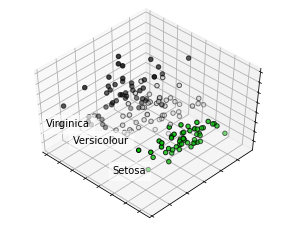

In [22]:
np.random.seed(5)

centers = [[1,1],[-1,-1],[1,-1]]
iris = datasets.load_iris()
x = iris.data
y = iris.target
fig = plt.figure(1, figsize=(4,3))
plt.clf

ax = Axes3D(fig, rect=[0,0,.95,1], elev=48, azim=134)

plt.cla()
pca = decomposition.PCA(n_components=3)
pca.fit(X)
X = pca.transform(X)

for name, label in [('Setosa', 0), ('Versicolour', 1), ('Virginica', 2)]:
    ax.text3D(X[y == label, 0].mean(),
              X[y == label, 1].mean() + 1.5,
              X[y == label, 2].mean(), name,
              horizontalalignment='center',
              bbox=dict(alpha=.5, edgecolor='w', facecolor='w'))

y = np.choose(y, [1,2,0]).astype(np.float)
ax.scatter(X[:,0],X[:,1],X[:,2], c=y, cmap=plt.cm.nipy_spectral, edgecolor='k')

ax.w_xaxis.set_ticklabels([])
ax.w_yaxis.set_ticklabels([])
ax.w_zaxis.set_ticklabels([])

plt.show()

## Rescaling  Data

In [25]:
import pandas, scipy
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(0,1))

print(x)

rescaledX = scaler.fit_transform(x)
np.set_printoptions(precision=3)
rescaledX

[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]
 [5.4 3.9 1.7 0.4]
 [4.6 3.4 1.4 0.3]
 [5.  3.4 1.5 0.2]
 [4.4 2.9 1.4 0.2]
 [4.9 3.1 1.5 0.1]
 [5.4 3.7 1.5 0.2]
 [4.8 3.4 1.6 0.2]
 [4.8 3.  1.4 0.1]
 [4.3 3.  1.1 0.1]
 [5.8 4.  1.2 0.2]
 [5.7 4.4 1.5 0.4]
 [5.4 3.9 1.3 0.4]
 [5.1 3.5 1.4 0.3]
 [5.7 3.8 1.7 0.3]
 [5.1 3.8 1.5 0.3]
 [5.4 3.4 1.7 0.2]
 [5.1 3.7 1.5 0.4]
 [4.6 3.6 1.  0.2]
 [5.1 3.3 1.7 0.5]
 [4.8 3.4 1.9 0.2]
 [5.  3.  1.6 0.2]
 [5.  3.4 1.6 0.4]
 [5.2 3.5 1.5 0.2]
 [5.2 3.4 1.4 0.2]
 [4.7 3.2 1.6 0.2]
 [4.8 3.1 1.6 0.2]
 [5.4 3.4 1.5 0.4]
 [5.2 4.1 1.5 0.1]
 [5.5 4.2 1.4 0.2]
 [4.9 3.1 1.5 0.2]
 [5.  3.2 1.2 0.2]
 [5.5 3.5 1.3 0.2]
 [4.9 3.6 1.4 0.1]
 [4.4 3.  1.3 0.2]
 [5.1 3.4 1.5 0.2]
 [5.  3.5 1.3 0.3]
 [4.5 2.3 1.3 0.3]
 [4.4 3.2 1.3 0.2]
 [5.  3.5 1.6 0.6]
 [5.1 3.8 1.9 0.4]
 [4.8 3.  1.4 0.3]
 [5.1 3.8 1.6 0.2]
 [4.6 3.2 1.4 0.2]
 [5.3 3.7 1.5 0.2]
 [5.  3.3 1.4 0.2]
 [7.  3.2 4.7 1.4]
 [6.4 3.2 4.5 1.5]
 [6.9 3.1 4.

array([[0.222, 0.625, 0.068, 0.042],
       [0.167, 0.417, 0.068, 0.042],
       [0.111, 0.5  , 0.051, 0.042],
       [0.083, 0.458, 0.085, 0.042],
       [0.194, 0.667, 0.068, 0.042],
       [0.306, 0.792, 0.119, 0.125],
       [0.083, 0.583, 0.068, 0.083],
       [0.194, 0.583, 0.085, 0.042],
       [0.028, 0.375, 0.068, 0.042],
       [0.167, 0.458, 0.085, 0.   ],
       [0.306, 0.708, 0.085, 0.042],
       [0.139, 0.583, 0.102, 0.042],
       [0.139, 0.417, 0.068, 0.   ],
       [0.   , 0.417, 0.017, 0.   ],
       [0.417, 0.833, 0.034, 0.042],
       [0.389, 1.   , 0.085, 0.125],
       [0.306, 0.792, 0.051, 0.125],
       [0.222, 0.625, 0.068, 0.083],
       [0.389, 0.75 , 0.119, 0.083],
       [0.222, 0.75 , 0.085, 0.083],
       [0.306, 0.583, 0.119, 0.042],
       [0.222, 0.708, 0.085, 0.125],
       [0.083, 0.667, 0.   , 0.042],
       [0.222, 0.542, 0.119, 0.167],
       [0.139, 0.583, 0.153, 0.042],
       [0.194, 0.417, 0.102, 0.042],
       [0.194, 0.583, 0.102, 0.125],
 

## Standardizing Data

In [27]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler().fit(x)
rescaledX = scaler.transform(x)
rescaledX

array([[-9.007e-01,  1.019e+00, -1.340e+00, -1.315e+00],
       [-1.143e+00, -1.320e-01, -1.340e+00, -1.315e+00],
       [-1.385e+00,  3.284e-01, -1.397e+00, -1.315e+00],
       [-1.507e+00,  9.822e-02, -1.283e+00, -1.315e+00],
       [-1.022e+00,  1.249e+00, -1.340e+00, -1.315e+00],
       [-5.372e-01,  1.940e+00, -1.170e+00, -1.052e+00],
       [-1.507e+00,  7.888e-01, -1.340e+00, -1.184e+00],
       [-1.022e+00,  7.888e-01, -1.283e+00, -1.315e+00],
       [-1.749e+00, -3.622e-01, -1.340e+00, -1.315e+00],
       [-1.143e+00,  9.822e-02, -1.283e+00, -1.447e+00],
       [-5.372e-01,  1.479e+00, -1.283e+00, -1.315e+00],
       [-1.264e+00,  7.888e-01, -1.227e+00, -1.315e+00],
       [-1.264e+00, -1.320e-01, -1.340e+00, -1.447e+00],
       [-1.870e+00, -1.320e-01, -1.511e+00, -1.447e+00],
       [-5.251e-02,  2.170e+00, -1.454e+00, -1.315e+00],
       [-1.737e-01,  3.091e+00, -1.283e+00, -1.052e+00],
       [-5.372e-01,  1.940e+00, -1.397e+00, -1.052e+00],
       [-9.007e-01,  1.019e+00,

## Normalizing Data

In [29]:
from sklearn.preprocessing import Normalizer
scaler = Normalizer().fit(x)
normalizedX = scaler.transform(x)
normalizedX

array([[0.804, 0.552, 0.221, 0.032],
       [0.828, 0.507, 0.237, 0.034],
       [0.805, 0.548, 0.223, 0.034],
       [0.8  , 0.539, 0.261, 0.035],
       [0.791, 0.569, 0.221, 0.032],
       [0.784, 0.566, 0.247, 0.058],
       [0.78 , 0.577, 0.237, 0.051],
       [0.802, 0.545, 0.241, 0.032],
       [0.806, 0.532, 0.257, 0.037],
       [0.818, 0.518, 0.25 , 0.017],
       [0.804, 0.551, 0.223, 0.03 ],
       [0.787, 0.557, 0.262, 0.033],
       [0.823, 0.514, 0.24 , 0.017],
       [0.803, 0.56 , 0.205, 0.019],
       [0.811, 0.559, 0.168, 0.028],
       [0.774, 0.597, 0.204, 0.054],
       [0.794, 0.574, 0.191, 0.059],
       [0.803, 0.551, 0.221, 0.047],
       [0.807, 0.538, 0.241, 0.042],
       [0.78 , 0.581, 0.229, 0.046],
       [0.817, 0.515, 0.257, 0.03 ],
       [0.786, 0.57 , 0.231, 0.062],
       [0.776, 0.607, 0.169, 0.034],
       [0.806, 0.522, 0.269, 0.079],
       [0.776, 0.55 , 0.307, 0.032],
       [0.826, 0.496, 0.264, 0.033],
       [0.798, 0.542, 0.255, 0.064],
 

## Binarizing Data

In [30]:
from sklearn.preprocessing import Binarizer
binarizer = Binarizer(threshold=0.0).fit(x)
binaryX = binarizer.transform(x)
binaryX

array([[1., 1., 1., 1.],
       [1., 1., 1., 1.],
       [1., 1., 1., 1.],
       [1., 1., 1., 1.],
       [1., 1., 1., 1.],
       [1., 1., 1., 1.],
       [1., 1., 1., 1.],
       [1., 1., 1., 1.],
       [1., 1., 1., 1.],
       [1., 1., 1., 1.],
       [1., 1., 1., 1.],
       [1., 1., 1., 1.],
       [1., 1., 1., 1.],
       [1., 1., 1., 1.],
       [1., 1., 1., 1.],
       [1., 1., 1., 1.],
       [1., 1., 1., 1.],
       [1., 1., 1., 1.],
       [1., 1., 1., 1.],
       [1., 1., 1., 1.],
       [1., 1., 1., 1.],
       [1., 1., 1., 1.],
       [1., 1., 1., 1.],
       [1., 1., 1., 1.],
       [1., 1., 1., 1.],
       [1., 1., 1., 1.],
       [1., 1., 1., 1.],
       [1., 1., 1., 1.],
       [1., 1., 1., 1.],
       [1., 1., 1., 1.],
       [1., 1., 1., 1.],
       [1., 1., 1., 1.],
       [1., 1., 1., 1.],
       [1., 1., 1., 1.],
       [1., 1., 1., 1.],
       [1., 1., 1., 1.],
       [1., 1., 1., 1.],
       [1., 1., 1., 1.],
       [1., 1., 1., 1.],
       [1., 1., 1., 1.],


## Mean Removal

In [36]:
from sklearn.preprocessing import scale
data_standardized = scale(x)
data_standardized.mean(axis=0), data_standardized.std(axis=0)

(array([-1.690e-15, -1.843e-15, -1.699e-15, -1.409e-15]),
 array([1., 1., 1., 1.]))

## Describing the dataset

In [43]:
df_iris=pandas.read_csv('C:\\Users\\morio\\PycharmProjects\\Free\\venv\\Lib\\site-packages\\tensorflow\\contrib\\learn\\python\\learn\\datasets\\data\\iris.csv')
df_iris.describe()

,150,4,setosa,versicolor,virginica
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667,1.000000
std,0.828066,0.433594,1.764420,0.763161,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


## Shape of the dataset

In [45]:
df_iris.shape

(150, 5)

## Extracting data from the dataset

In [47]:
df_iris.head(10)

,150,4,setosa,versicolor,virginica
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
5,5.4,3.9,1.7,0.4,0
6,4.6,3.4,1.4,0.3,0
7,5.0,3.4,1.5,0.2,0
8,4.4,2.9,1.4,0.2,0
9,4.9,3.1,1.5,0.1,0


## Performing operations around a variable

In [50]:
df_iris.groupby('4').size()

4
2.0     1
2.2     3
2.3     4
2.4     3
2.5     8
2.6     5
2.7     9
2.8    14
2.9    10
3.0    26
3.1    12
3.2    13
3.3     6
3.4    12
3.5     6
3.6     3
3.7     3
3.8     6
3.9     2
4.0     1
4.1     1
4.2     1
4.4     1
dtype: int64

## Histograms

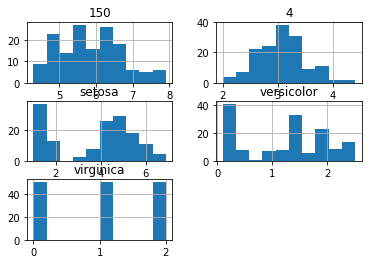

In [61]:
df_iris.hist()
plt.show()

## Density Plots

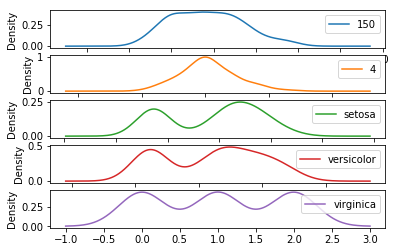

In [63]:
df_iris.plot(kind='density', subplots=True, sharex=False)
plt.show()

## Box and Whisker Plots

150              AxesSubplot(0.125,0.536818;0.227941x0.343182)
4             AxesSubplot(0.398529,0.536818;0.227941x0.343182)
setosa        AxesSubplot(0.672059,0.536818;0.227941x0.343182)
versicolor          AxesSubplot(0.125,0.125;0.227941x0.343182)
virginica        AxesSubplot(0.398529,0.125;0.227941x0.343182)
dtype: object

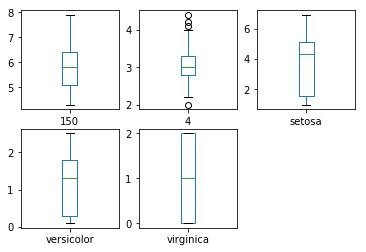

In [79]:
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
df_iris.plot(kind='box', ax=ax, subplots=True, layout=(2, 3), sharex=False, sharey=False)

## Correlation Matrix Plot

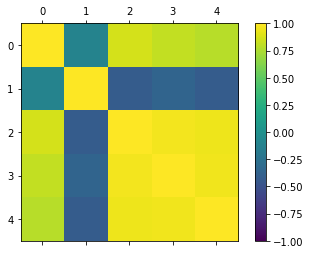

In [85]:
correlations_iris = df_iris.corr()
fig = plt.figure()
ax = fig.add_subplot(111)
cax=ax.matshow(correlations_iris, vmin=-1, vmax=1)
fig.colorbar(cax)

ticks = np.arange(0,5,1)
ax.set_yticks(ticks)
plt.show()

## Scatterplot Matrix

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000203B63CB390>,
      dtype=object)

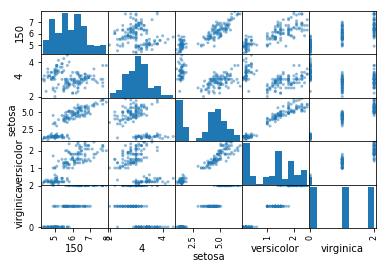

In [86]:
pandas.plotting.scatter_matrix(df_iris)